# ML Beginner

<br><br>
**Description**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Any business aims to maximize the number of clients. To achieve this goal, it's important not only to try to attract new customers but also to retain existing ones. Retaining a customer is cheaper for a company than acquiring a new one. Additionally, a new customer might be less interested in the business's services and could be challenging to work with, whereas there is already existing data on interactions with the service for old customers.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Thus, by predicting churn, we can react promptly and attempt to retain a customer who intends to leave. Leveraging data on the services the customer uses, we can make a special offer, aiming to change their decision to leave the service provider. This makes the retention task easier to implement compared to the challenge of attracting new users about whom we have no prior information.<br>

&nbsp;&nbsp;&nbsp;&nbsp; The dataset provided is from a telecommunications company. It contains information about nearly six thousand users, their demographic characteristics, the services they use, the duration of their usage with the operator, payment methods, and payment amounts.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; The task is to analyze the data and forecast user churn (identify individuals who will renew their contract and those who will not).

1. Data description.
2. Studying dependencies and formulating hypotheses.
3. Building models for predicting churn.
4. Comparing the quality of the obtained models.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Data description](#1.-Data-description)<br>
[2. Studying dependencies and formulating hypotheses](#2.-Studying-dependencies-and-formulating-hypotheses)<br>
[3. Building models for predicting churn](#3.-Building-models-for-predicting-churn)<br>
[4. Comparing the quality of the models](#4.-Comparing-the-quality-of-the-models) <br>


## Codebook

<br><br>

Dataset `telecom_users.csv`:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – customer id<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – customer gender (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – retirees status (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – marital status (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – dependents status (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – the number of months the person has been a customer of the company.<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – the telephone service (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – the multiple phone lines (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – internet service provider (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – online security service (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – online backup service (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – device protection service (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – tech support service (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – streaming TV service (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – streaming movies service (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – customer's contract type (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – does the customer use paperless billing (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – the current monthly payment amount<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – the total amount the customer has paid for services over time<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – has churn occurred (Yes or No)<br>

# 1. Data description

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [3]:
telecom_users = pd.read_csv('telecom_users.csv')
telecom_users.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
print(f'Dataset consists of {telecom_users.shape[0]} rows and {telecom_users.shape[1]} columns.')

Dataset consists of 5986 rows and 22 columns.


In [5]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


There are no missing values.

In [5]:
telecom_users = telecom_users.drop(columns='Unnamed: 0')

telecom_users['gender'] = telecom_users['gender'].apply(lambda x: 1 if x == 'Male' else 0)

columns_to_apply = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in columns_to_apply:
     telecom_users[column] = telecom_users[column].apply(lambda x: 1 if x == 'Yes' else 0)

telecom_users['TotalCharges'] = telecom_users['TotalCharges'].replace({' ': 0, '': 0})
telecom_users['TotalCharges'] = telecom_users['TotalCharges'].astype(float)

In [6]:
telecom_users.groupby('gender').agg(customer_count=('customerID', 'count'))

,customer_count
gender,
0,2936
1,3050


It's evident that there's no gender skew. There are nearly an equal number of users from both genders.

In [8]:
telecom_users.groupby('SeniorCitizen').agg(customer_count=('customerID', 'count'))

,customer_count
SeniorCitizen,
0,5020
1,966


In [7]:
senior = round(telecom_users[telecom_users['SeniorCitizen'] == 1]['customerID'].count() / telecom_users.shape[0] * 100, 2)
print(f'Retirees comprise {senior}% of the users.')

Retirees comprise 16.14% of the users.


In [10]:
telecom_users.groupby('Partner').agg(customer_count=('customerID', 'count'))

,customer_count
Partner,
0,3082
1,2904


Here, we can see that there's roughly an equal number of users who are married and single.

In [8]:
dependents = round(telecom_users[telecom_users['Dependents'] == 1]['customerID'].count() / telecom_users.shape[0] * 100, 2)
print(f'Dependents make up {dependents}% of the users.')

Dependents make up 29.92% of the users.


Here, we see that the majority of users haven't reached retirement age, while approximately 30% have children.

Next, let's consider the duration of service usage by customers.

In [12]:
telecom_users.tenure.describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

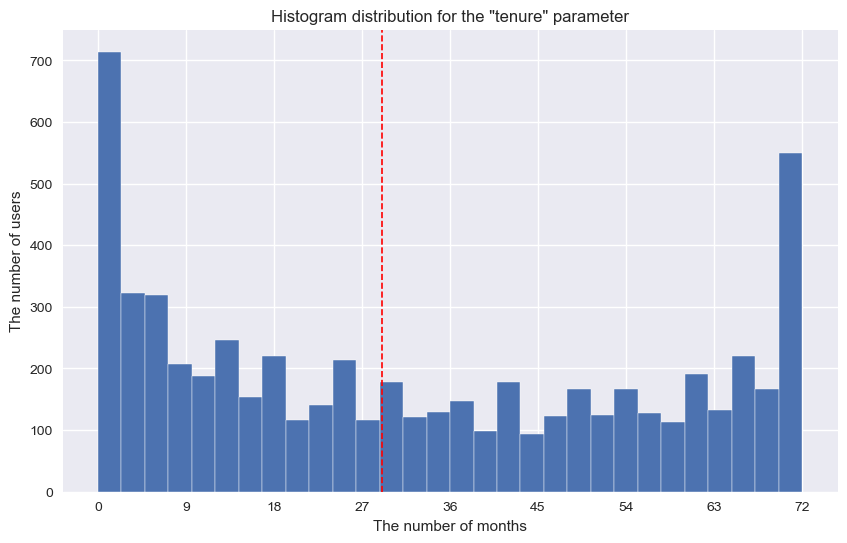

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

series = telecom_users['tenure']
plt.hist(series, bins=30, edgecolor='white')

bin_width = series.max() / 8

x_range = [i * bin_width for i in range(0, 9)]

plt.xticks(x_range)
plt.axvline(x=np.nanmedian(telecom_users.tenure), color='red', linestyle='--', linewidth=1.2)
ax.set_xlabel('The number of months')
ax.set_ylabel('The number of users')
ax.set_title('Histogram distribution for the "tenure" parameter')

plt.show()

From the histogram, it's evident that the highest number of users falls within the range of approximately 0 to 2 months and approximately 70 to 72 months. However, the median tenure is 29 months. This might suggest that users either aren't satisfied with the services provided and terminate their subscription after a few months or could indicate an influx of new users.

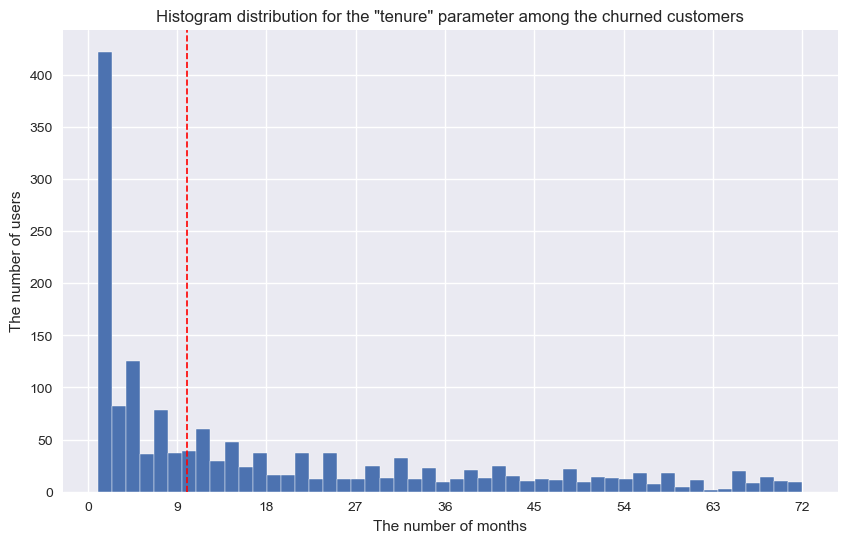

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

series = telecom_users[telecom_users['Churn'] == 1]['tenure']
plt.hist(series, bins=50, edgecolor='white')

bin_width = series.max() / 8

x_range = [i * bin_width for i in range(0, 9)]

plt.xticks(x_range)
plt.axvline(x=np.nanmedian(series), color='red', linestyle='--', linewidth=1.2)
ax.set_xlabel('The number of months')
ax.set_ylabel('The number of users')
ax.set_title('Histogram distribution for the "tenure" parameter among the churned customers')

plt.show()

The histogram shows that the majority of users churned within the first two months.

In [14]:
telecom_users.groupby('PhoneService').agg(customer_count=('customerID', 'count'))

,customer_count
PhoneService,
0,590
1,5396


In [15]:
phone = round(telecom_users[telecom_users['PhoneService'] == 1]['customerID'].count() / telecom_users.shape[0] * 100, 2)
print(f'Telephone service is subscribed by {phone}% of users.')

Telephone service is subscribed by 90.14% of users.


In [16]:
multiple_lines = round(telecom_users[
                       telecom_users['MultipleLines'] == 'Yes'
                       ]['customerID'].count() / telecom_users[
                       telecom_users['PhoneService'] == 1
                       ]['customerID'].count() * 100, 2)
print(f'Among them, {multiple_lines}% have multiple phone lines connected.')

Among them, 47.22% have multiple phone lines connected.


In [17]:
telecom_users.groupby('InternetService').agg(customer_count=('customerID', 'count'))

,customer_count
InternetService,
DSL,2068
Fiber optic,2627
No,1291


In [19]:
internet = round(telecom_users[telecom_users['InternetService'] != 'No']['customerID'].count() / telecom_users.shape[0] * 100, 2)
print(f'Internet service is subscribed by {internet}% of users.')

Internet service is subscribed by 78.43% of users.


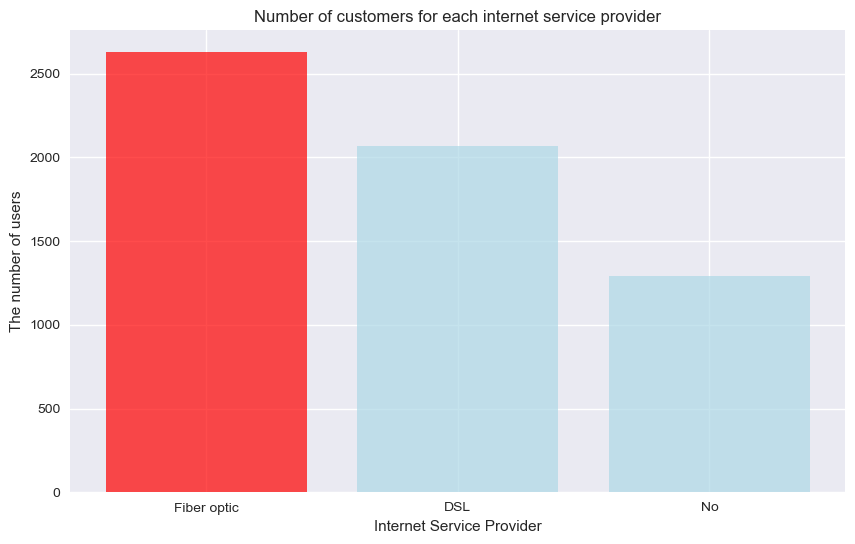

In [20]:
data = telecom_users.groupby('InternetService')['customerID'].count().reset_index().sort_values(by='customerID', ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'lightblue', 'lightblue']
ax.bar(data['InternetService'], data['customerID'], color=colors, alpha=0.7)
ax.set_title('Number of customers for each internet service provider')
ax.set_xlabel('Internet Service Provider')
ax.set_ylabel('The number of users')

plt.show()

In [21]:
internet_users = telecom_users[telecom_users['InternetService'] != 'No']['customerID'].count()
fiber_optic = round(telecom_users[telecom_users['InternetService'] == 'Fiber optic']['customerID'].count() / internet_users * 100, 2)
print(f'{fiber_optic}% of users among those who used the internet service chose the Fiber Optic provider.')

55.95% of users among those who used the internet service chose the Fiber Optic provider.


Next, let's look at the types of contracts users engage in.

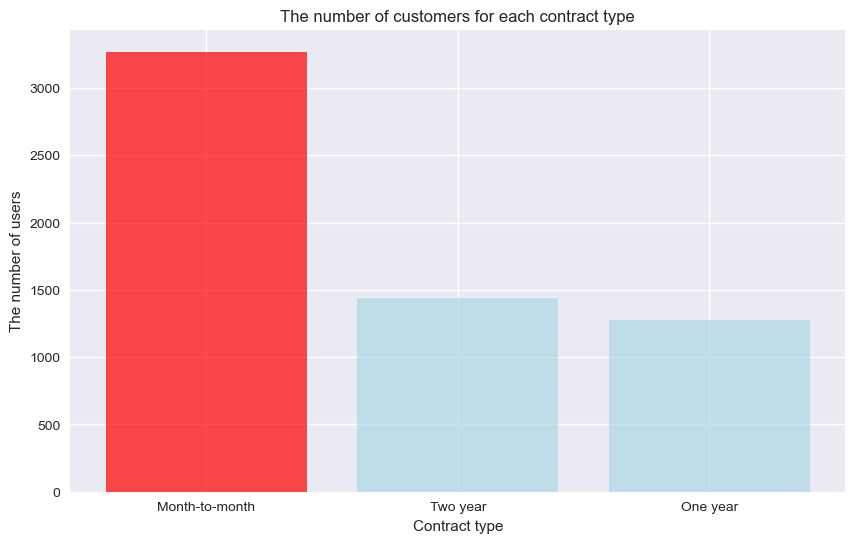

In [22]:
data = telecom_users.groupby('Contract')['customerID'].count().reset_index().sort_values(by='customerID', ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'lightblue', 'lightblue']
ax.bar(data['Contract'], data['customerID'], color=colors, alpha=0.7)
ax.set_title('The number of customers for each contract type')
ax.set_xlabel('Contract type')
ax.set_ylabel('The number of users')

plt.show()

The bar chart shows that more than half of the users prefer the month-to-month contract type. This might be associated with churn occurring after a few months.

Next, let's examine customers' expenditures on the provided services.

In [23]:
telecom_users.MonthlyCharges.describe()

count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

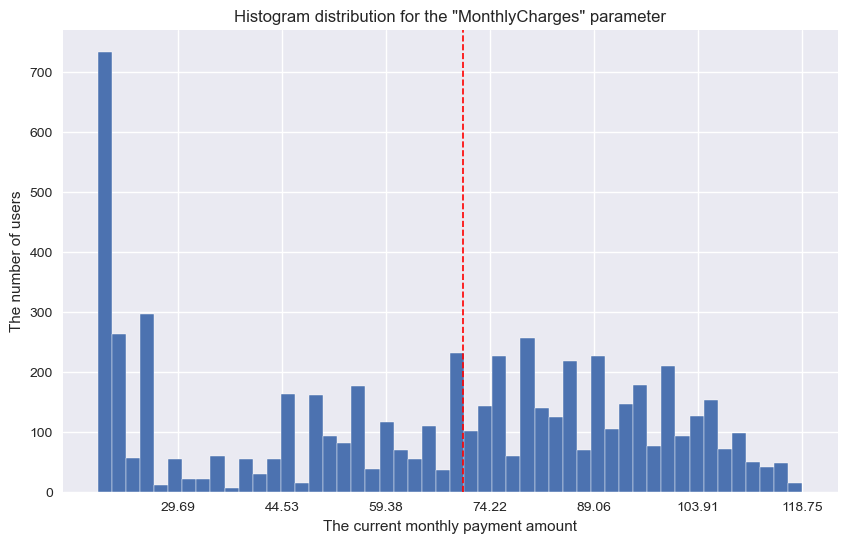

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

series = telecom_users['MonthlyCharges']
plt.hist(series, bins=50, edgecolor='white')

bin_width = series.max() / 8

x_range = [i * bin_width for i in range(2, 9)]

plt.xticks(x_range)
plt.axvline(x=np.nanmedian(telecom_users.MonthlyCharges), color='red', linestyle='--', linewidth=1.2)
ax.set_xlabel('The current monthly payment amount')
ax.set_ylabel('The number of users')
ax.set_title('Histogram distribution for the "MonthlyCharges" parameter')

plt.show()

From the histogram, there's a peak in the number of users in the range of approximately 20 to 23. It can be inferred that a large portion of users opts for a smaller service package. Additionally, the median monthly charge is around 70.

In [25]:
telecom_users.TotalCharges.describe()

count    5986.000000
mean     2294.221559
std      2274.164124
min         0.000000
25%       401.587500
50%      1408.575000
75%      3841.500000
max      8684.800000
Name: TotalCharges, dtype: float64

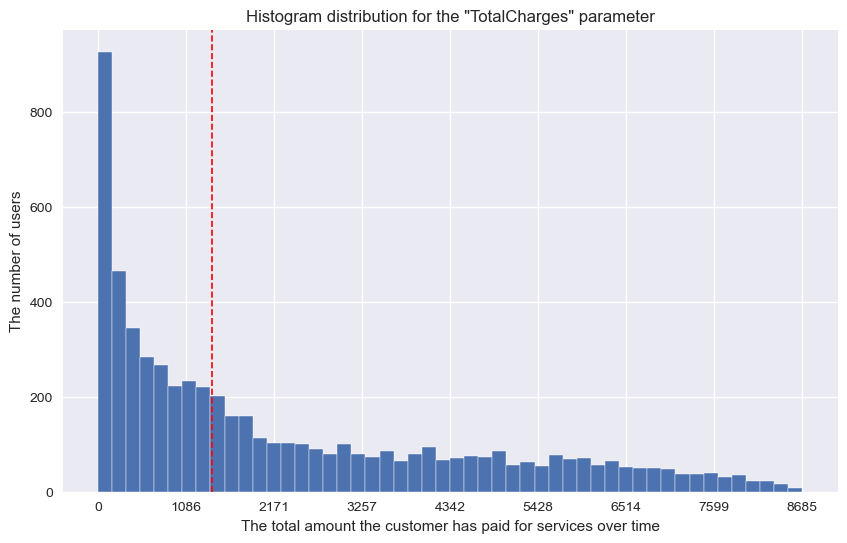

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

series = telecom_users['TotalCharges']
plt.hist(series, bins=50, edgecolor='white')

bin_width = series.max() / 8

x_range = [i * bin_width for i in range(0, 9)]

plt.xticks(x_range)
plt.axvline(x=np.nanmedian(telecom_users.TotalCharges), color='red', linestyle='--', linewidth=1.2)
ax.set_xlabel('The total amount the customer has paid for services over time')
ax.set_ylabel('The number of users')
ax.set_title('Histogram distribution for the "TotalCharges" parameter')

plt.show()

Histogram distribution of the total amount paid for services over time can indicate both a large number of new users and churn after a few months.

Let's identify the preferred payment method.

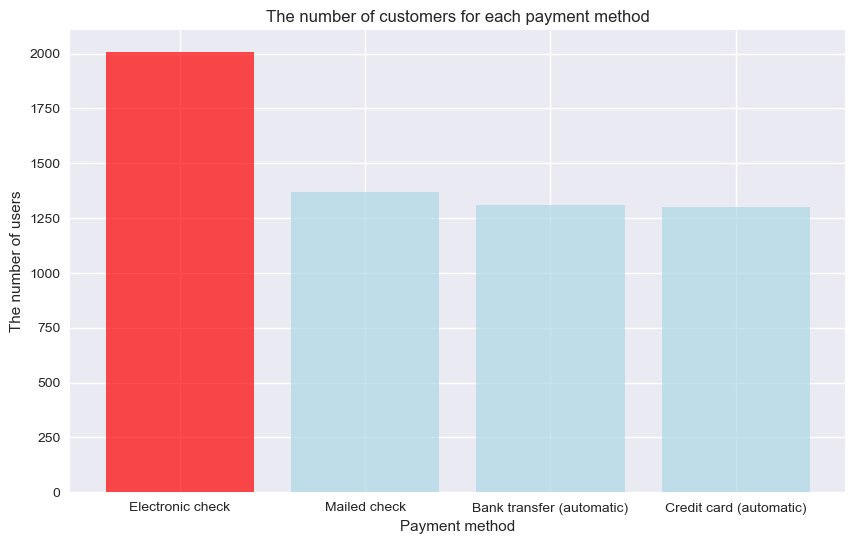

In [25]:
data = telecom_users.groupby('PaymentMethod')['customerID'].count().reset_index().sort_values(by='customerID', ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'lightblue', 'lightblue', 'lightblue']
ax.bar(data['PaymentMethod'], data['customerID'], color=colors, alpha=0.7)
ax.set_title('The number of customers for each payment method')
ax.set_xlabel('Payment method')
ax.set_ylabel('The number of users')

plt.show()

Electronic check is the preferred payment method.

Now, let's look at the churn among all users.

In [26]:
telecom_users.groupby('Churn').agg(customer_count=('customerID', 'count'))

,customer_count
Churn,
0,4399
1,1587


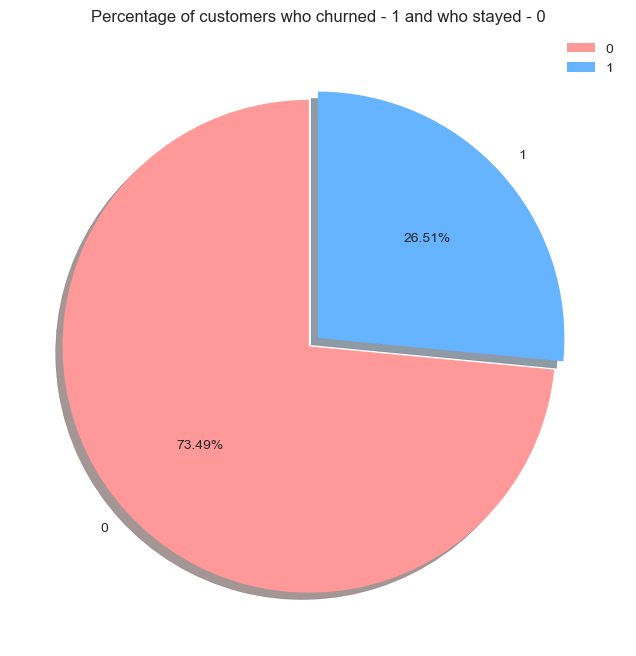

In [27]:
series = telecom_users.groupby('Churn')['customerID'].count()
labels = series.index

colors = ['#ff9999', '#66b3ff']

explode = (0.05, 0)

plt.figure(figsize=(8, 8))

plt.pie(series, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode, shadow=True)

plt.title('Percentage of customers who churned - 1 and who stayed - 0')
plt.legend()
plt.show()

Churn occurred in 26.51% of the users. The target variable is unbalanced.

# 2. Studying dependencies and formulating hypotheses

### Let's examine the relationship between customer churn and contract type.

In [30]:
telecom_users[telecom_users['Churn'] == 1].groupby('Contract').agg(mean_tenure=('tenure', 'mean'))

,mean_tenure
Contract,
Month-to-month,14.057225
One year,46.054054
Two year,60.707317


It appears that among those who churned, the average tenure for a Month-to-Month contract is just 14 months, whereas it's 46 months for a One-Year contract and 60 months for a Two-Year contract.

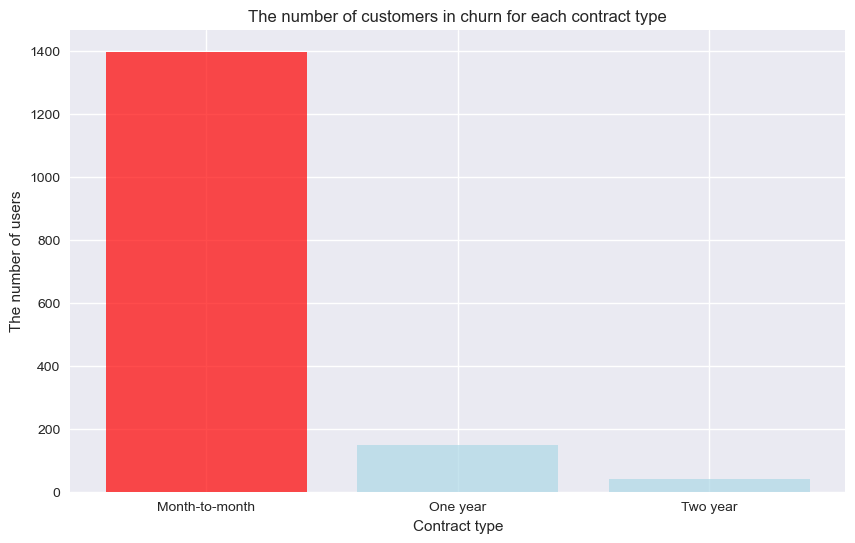

In [28]:
data = telecom_users[telecom_users['Churn'] == 1].groupby('Contract')['customerID'].count().reset_index().sort_values(by='customerID', ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'lightblue', 'lightblue']
ax.bar(data['Contract'], data['customerID'], color=colors, alpha=0.7)
ax.set_title('The number of customers in churn for each contract type')
ax.set_xlabel('Contract type')
ax.set_ylabel('The number of users')

plt.show()

Among the churned customers, there's a noticeable dominance of those with Month-to-Month contracts. Customers tend to churn after the contract period. To prevent customer churn, offering advantageous terms to encourage customers to sign longer contracts (such as promotions or discounts) could be effective.

### Let's examine the dependency of customer churn on the internet service provider they used.

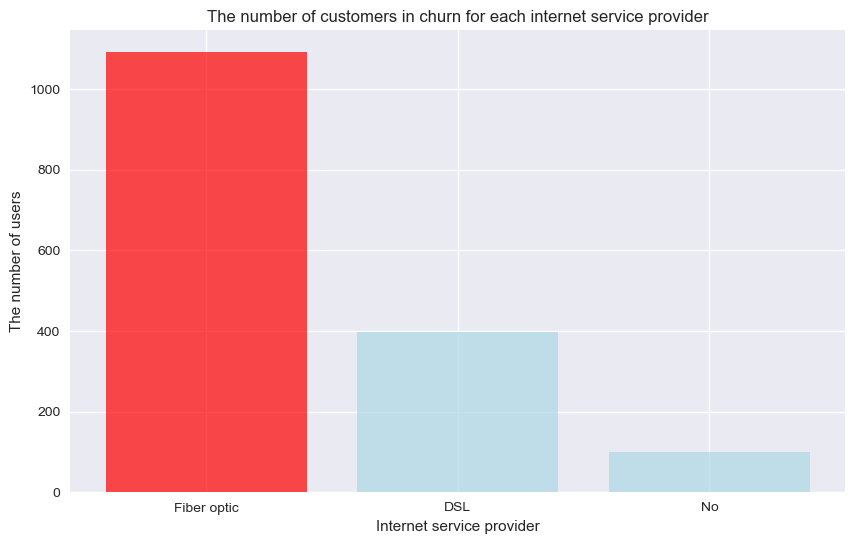

In [29]:
data = telecom_users[telecom_users['Churn'] == 1].groupby('InternetService')['customerID'].count().reset_index().sort_values(by='customerID', ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'lightblue', 'lightblue']
ax.bar(data['InternetService'], data['customerID'], color=colors, alpha=0.7)
ax.set_title('The number of customers in churn for each internet service provider')
ax.set_xlabel('Internet service provider')
ax.set_ylabel('The number of users')

plt.show()

In [30]:
internet_users_churn = telecom_users[
                    (telecom_users['InternetService'] != 'No') & (telecom_users['Churn'] == 1)
                    ]['customerID'].count()
fiber_optic = round(telecom_users[
                    (telecom_users['InternetService'] == 'Fiber optic') & (telecom_users['Churn'] == 1)
                    ]['customerID'].count() / internet_users_churn * 100, 2)

print(f'{fiber_optic}% of the users who churned among those using internet services chose the Fiber Optic provider.')

73.32% of the users who churned among those using internet services chose the Fiber Optic provider.


One can conclude that the quality of the Fiber Optic internet provider satisfies customers less than DSL.

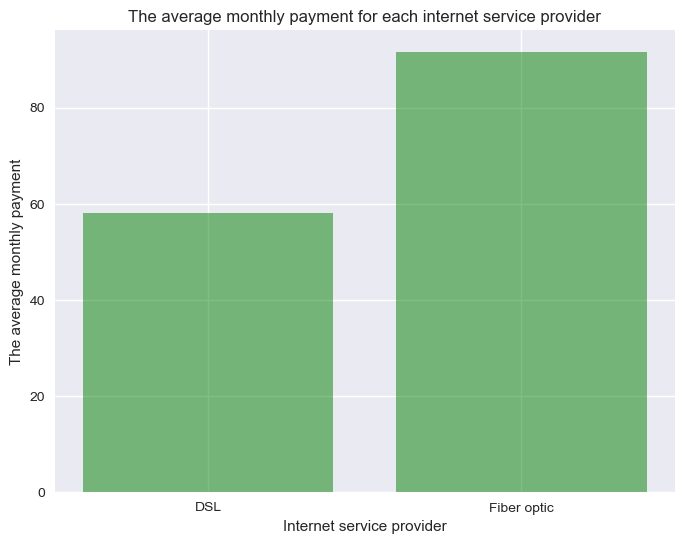

In [31]:
data = telecom_users[telecom_users['InternetService'] != 'No'].groupby('InternetService')['MonthlyCharges'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(data['InternetService'], data['MonthlyCharges'], color='green', alpha=0.5)
ax.set_title('The average monthly payment for each internet service provider')
ax.set_xlabel('Internet service provider')
ax.set_ylabel('The average monthly payment')

plt.show()

We also observe that the average monthly payment for Fiber Optic users is higher than DSL.

### Let's examine the relationship between the tenure of churned customers and their monthly charges.

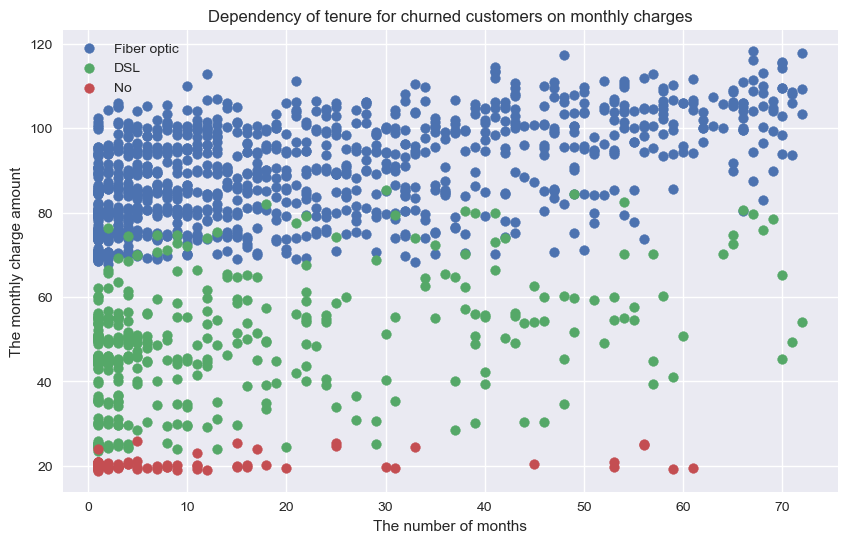

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

churn = telecom_users[telecom_users['Churn'] == 1].reset_index()
unique_services = telecom_users[telecom_users['Churn'] == 1]['InternetService'].unique()

for service in unique_services:
    data = churn[churn['InternetService'] == service]
    plt.scatter(data['tenure'], data['MonthlyCharges'], label=service)
    
plt.title('Dependency of tenure for churned customers on monthly charges')
plt.xlabel('The number of months')
plt.ylabel('The monthly charge amount')
plt.legend()
plt.show()

There doesn't seem to be a clear dependency. However, the graph also shows that the average monthly payment for Fiber Optic users is higher than for DSL.

### Let's check for correlations between the features and the target value "Churn".

Let's transform the data.

In [36]:
# MultipleLines: yes - 1, no - 0, No phone service - 2;
# InternetService: DSL - 1, no - 0, Fiber optic - 2;
# OnlineSecurity: yes - 1, no - 0, No internet service - 2;
# OnlineBackup: yes - 1, no - 0, No internet service - 2;
# DeviceProtection: yes - 1, no - 0, No internet service - 2;
# TechSupport: yes - 1, no - 0, No internet service - 2;
# StreamingTV: yes - 1, no - 0, No internet service - 2;
# StreamingMovies: yes - 1, no - 0, No internet service - 2;
# Contract: One year - 1, Month-to-month - 0, Two year - 2;
# PaymentMethod: Electronic check - 3, Mailed check - 2, Bank transfer (automatic) - 1, Credit card (automatic) - 0

In [33]:
columns_to_apply = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns_to_apply:
     telecom_users[column] = telecom_users[column].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))

telecom_users['InternetService'] = telecom_users['InternetService'].apply(lambda x: 1 if x == 'DSL' else (0 if x == 'No' else 2))
telecom_users['Contract'] = telecom_users['Contract'].apply(lambda x: 1 if x == 'One year' else (0 if x == 'Month-to-month' else 2))
telecom_users['PaymentMethod'] = telecom_users['PaymentMethod'].apply(
    lambda x: 3 if x == 'Electronic check' else (2 if x == 'Mailed check' else (1 if x == 'Bank transfer (automatic)' else 0))
)

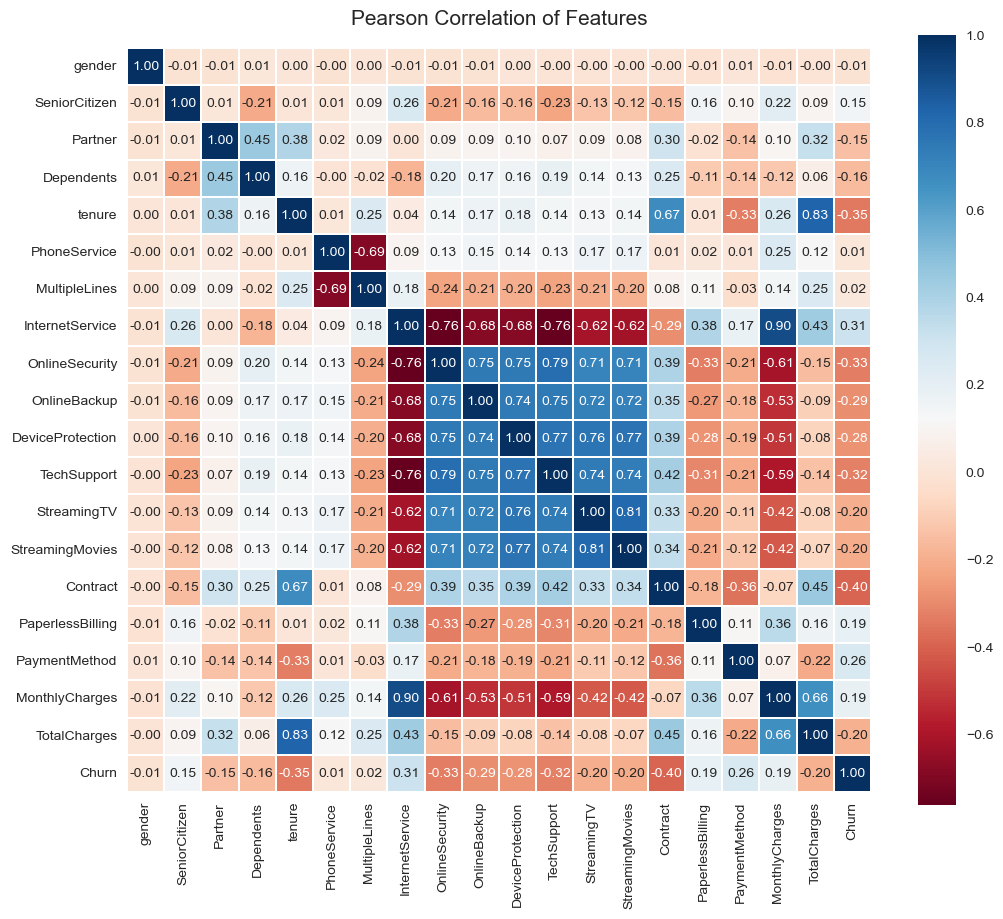

In [38]:
data = telecom_users.drop(columns='customerID')

colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features', y=1.02, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, fmt='.2f', cmap=colormap, linecolor='white', annot=True)
plt.show()

Graph shows a strong correlation between features like InternetService and MonthlyCharges. There's also a strong correlation between features like tenure and Contract. The relationship between tenure and TotalCharges is quite logical.

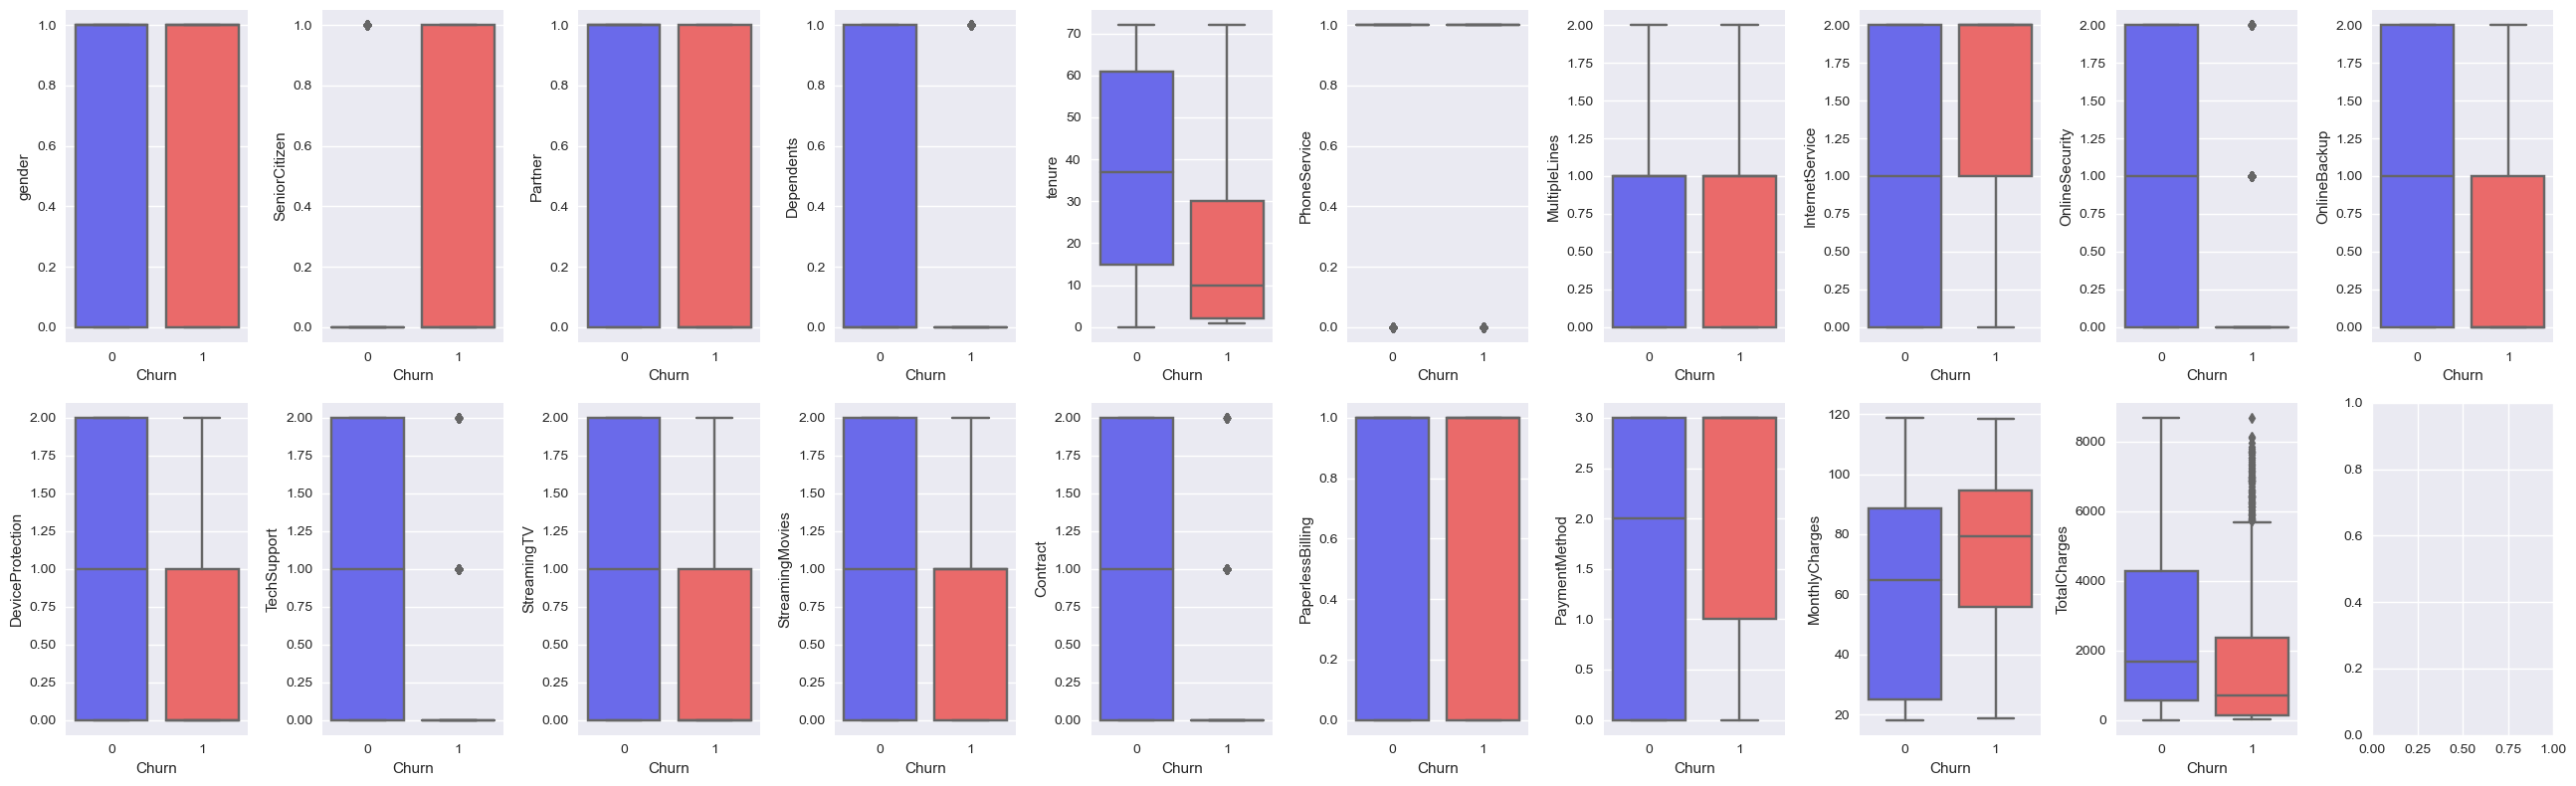

In [39]:
col_len = len(telecom_users.drop(['Churn', 'customerID'], axis=1).columns) / 2
fig, ax = plt.subplots(2, int(np.ceil(col_len)), figsize=(26, 8))
for i, col in enumerate(telecom_users.drop(['Churn', 'customerID'], axis=1).columns):
    sns.boxplot(data=telecom_users, x='Churn', y=col, ax=ax[int(i // col_len), int(i - (col_len * (i // col_len)))], whis=1.5, palette='seismic')
plt.tight_layout()

The features gender, Partner, Multiple Lines, and Paperless Billing do not significantly impact the target variable Churn.

In [40]:
target_corr = telecom_users.corrwith(telecom_users['Churn'])
most_corr_columns = target_corr[target_corr.abs() >= 0.3].drop('Churn')
most_corr_columns.sort_values()

Contract          -0.396446
tenure            -0.348469
OnlineSecurity    -0.330192
TechSupport       -0.323871
InternetService    0.310417
dtype: float64

The most useful features are Contract, tenure, OnlineSecurity, TechSupport, and InternetService.

# 3. Building models for predicting churn

When working with large volumes of data, it's crucial to choose models that can efficiently handle this data while maintaining high performance. For solving this binary classification task, I'll be using GradientBoosting, RandomForest, LogisticRegression, ExtraTreesClassifier, XGB, Stacking, Boosting along with VotingClassifier. These models often exhibit good performance on large volumes of data.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

In [35]:
# The parameters for base algorithms

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

etc_params = {'n_estimators': range(10, 100, 10), # ExtraTreesClassifier
              'min_samples_leaf': range(1, 5)}

lr_params = {'C': np.arange(0.5, 1, 0.1)} # LogisticRegression

xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)} # XGBClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [36]:
# Splitting data into training and testing sets

data = telecom_users.drop(['customerID', 'Churn', 'gender', 'Partner', 'MultipleLines', 'PaperlessBilling'], axis=1)
targets = telecom_users.loc[:, 'Churn']

x_train, x_test, y_train, y_test = train_test_split(data,
                                                    targets,
                                                    train_size=0.3,
                                                    stratify=targets,
                                                    random_state=17)

In [37]:
# Defining classifier objects

gbc = GradientBoostingClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17)
etc = ExtraTreesClassifier(random_state=17)
lr = LogisticRegression(random_state=17)
xgb = XGBClassifier(random_state=17)

In [38]:
# GridSearch for each of the models

gbc_grid = GridSearchCV(gbc, gbc_params, scoring='roc_auc', cv=skf)
rfc_grid = GridSearchCV(rfc, rfc_params, scoring='roc_auc', cv=skf)
etc_grid = GridSearchCV(etc, etc_params, scoring='roc_auc', cv=skf)
lr_grid = GridSearchCV(lr, lr_params, scoring='roc_auc', cv=skf)
xgb_grid = GridSearchCV(xgb, xgb_params, scoring='roc_auc', cv=skf)

gbc_model = gbc_grid.fit(x_train, y_train)  # Training GradientBoostingClassifier model using cross-validation
rfc_model = rfc_grid.fit(x_train, y_train)  # Training RandomForestClassifier model using cross-validation
etc_model = etc_grid.fit(x_train, y_train)  # Training ExtraTreesClassifier model using cross-validation
lr_model = lr_grid.fit(x_train, y_train)  # Training LogisticRegression model using cross-validation
xgb_model = xgb_grid.fit(x_train, y_train)  # Training XGBClassifier model using cross-validation

In [39]:
# Determining the best parameters

gbc_best_params = gbc_grid.best_params_
rfc_best_params = rfc_grid.best_params_
etc_best_params = etc_grid.best_params_
lr_best_params = lr_grid.best_params_
xgb_best_params = xgb_grid.best_params_

print(f"The best combination of parameters for GradientBoostingClassifier: {gbc_best_params}\n\
The best combination of parameters for RandomForestClassifier: {rfc_best_params}\n\
The best combination of parameters for ExtraTreesClassifier: {etc_best_params}\n\
The best combination of parameters for LogisticRegression: {lr_best_params}\n\
The best combination of parameters for XGBClassifier: {xgb_best_params}\n")

The best combination of parameters for GradientBoostingClassifier: {'learning_rate': 0.1}
The best combination of parameters for RandomForestClassifier: {'min_samples_leaf': 4, 'n_estimators': 70}
The best combination of parameters for ExtraTreesClassifier: {'min_samples_leaf': 4, 'n_estimators': 60}
The best combination of parameters for LogisticRegression: {'C': 0.8999999999999999}
The best combination of parameters for XGBClassifier: {'eta': 0.1, 'min_child_weight': 9, 'n_estimators': 35, 'subsample': 0.30000000000000004}



In [40]:
# Generating predictions using the trained models

gbc_pred = gbc_model.predict(x_test)
rfc_pred = rfc_model.predict(x_test)
etc_pred = etc_model.predict(x_test)
lr_pred = lr_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)

### Stacking

Base algorithms: GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, LogisticRegression. Meta-algorithm: XGBClassifier.

In [41]:
from sklearn.model_selection import cross_val_predict

def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    meta_mtrx = np.empty((data_train.shape[0], len(models)))
    for n, model in enumerate(models):
        meta_mtrx[:,n] = cross_val_predict(model,
                                           data_train, 
                                           targets_train,
                                           cv=cv,
                                           method='predict'
                                          )
        model.fit(data_train, targets_train)
    meta_model = meta_alg.fit(meta_mtrx, targets_train)
    meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
    
    for n, model in enumerate(models):
        meta_mtrx_test[:,n] = model.predict(data_test)
        
    meta_predict = meta_alg.predict(meta_mtrx_test)
        
    return meta_predict

In [42]:
models = [gbc, rfc, etc, lr]

meta_xgb_grid = xgb_grid

meta_mtrx = np.empty((x_test.shape[0], len(models)))
predictions_models = [gbc_pred, rfc_pred, etc_pred, lr_pred]
for n, model in enumerate(predictions_models):
    meta_mtrx[:, n] = model
    
meta_xgb_grid.fit(meta_mtrx, y_test)

meta_xgb_best_params = meta_xgb_grid.best_params_
print(f"The best parameters for the XGBoost meta-algorithm: {meta_xgb_best_params}")

The best parameters for the XGBoost meta-algorithm: {'eta': 0.8, 'min_child_weight': 8, 'n_estimators': 65, 'subsample': 0.7000000000000002}


In [66]:
gbc_best = GradientBoostingClassifier(**gbc_best_params)
rfc_best = RandomForestClassifier(**rfc_best_params)
etc_best = ExtraTreesClassifier(**etc_best_params)
lr_best = LogisticRegression(**lr_best_params)

meta_best = XGBClassifier(**meta_xgb_best_params)

models = [gbc_best, rfc_best, etc_best, lr_best]

In [67]:
meta_pred = stacking(models, meta_best, data, targets, x_test, y_test, random_state=None, test_size=None, cv=5)

### Boosting

Let's create DMatrix objects for the training and testing datasets.

In [105]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

Let's set the parameters for the algorithm and the number of iterations.

In [106]:
params = {'objective': 'binary:logistic',
          'max_depth': 1,
          'silent': 1,
          'eta': 1}

num_rounds = 60

Initially, by obtaining the probabilistic output of the model, let's set the threshold between classes at 50% (predictions_proba > 0.5).

In [114]:
model = xgb.train(params, dtrain, num_rounds)
predictions_proba = model.predict(dtest)

binary_predictions = np.where(predictions_proba > 0.5, True, False)

Let's output the confusion matrix, precision, recall, accuracy and AUC for the obtained predictions.

In [115]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

conf_matrix = confusion_matrix(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
accuracy = accuracy_score(y_test, binary_predictions)
auc_score = roc_auc_score(y_test, predictions_proba)

print('Confusion matrix:\n', conf_matrix)
print()
print('Precision: %.5f' % precision)
print('Recall: %.5f' % recall)
print('Accuracy: %.5f' % accuracy)
print('AUC: %.5f' % auc_score)

Confusion matrix:
 [[2750  330]
 [ 537  574]]

Precision: 0.63496
Recall: 0.51665
Accuracy: 0.79313
AUC: 0.83257


Now, let's set the threshold between classes to 45% (predictions_proba > 0.45).

In [116]:
binary_predictions = np.where(predictions_proba > 0.45, True, False)

conf_matrix = confusion_matrix(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
accuracy = accuracy_score(y_test, binary_predictions)
auc_score = roc_auc_score(y_test, predictions_proba)

print('Confusion matrix:\n', conf_matrix)
print()
print('Precision: %.5f' % precision)
print('Recall: %.5f' % recall)
print('Accuracy: %.5f' % accuracy)
print('AUC: %.5f' % auc_score)

Confusion matrix:
 [[2671  409]
 [ 460  651]]

Precision: 0.61415
Recall: 0.58596
Accuracy: 0.79265
AUC: 0.83257


We're seeing an increase in Recall while Precision has decreased.

Now, let's set the threshold between classes to 40% (predictions_proba > 0.40).

In [117]:
binary_predictions = np.where(predictions_proba > 0.40, True, False)

conf_matrix = confusion_matrix(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
accuracy = accuracy_score(y_test, binary_predictions)
auc_score = roc_auc_score(y_test, predictions_proba)

print('Confusion matrix:\n', conf_matrix)
print()
print('Precision: %.5f' % precision)
print('Recall: %.5f' % recall)
print('Accuracy: %.5f' % accuracy)
print('AUC: %.5f' % auc_score)

Confusion matrix:
 [[2550  530]
 [ 397  714]]

Precision: 0.57395
Recall: 0.64266
Accuracy: 0.77881
AUC: 0.83257


The Recall has increased even more, while Precision has decreased further.

### VotingClassifier

In [68]:
from sklearn.ensemble import VotingClassifier

models = [
    ('gbc', gbc_grid),
    ('rf', rfc_grid),
    ('et', etc_grid),
    ('lr', lr_grid)
]

voting_clf = VotingClassifier(estimators=models, voting='soft')
voting_clf.fit(x_train, y_train)
voting_clf_pred = voting_clf.predict(x_test)

# 4. Comparing the quality of the models

In [60]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score

In [94]:
# GradientBoostingClassifier
print('_'*40, '\n')
gbc_pred_proba = gbc_model.predict_proba(x_test)
print(f'GradientBoostingClassifier\nrecall: {recall_score(y_test, gbc_pred)}\n\
precision: {precision_score(y_test, gbc_pred)}\n\
accuracy: {accuracy_score(y_test, gbc_pred)}\n\
AUC: {roc_auc_score(y_test, gbc_pred_proba[:,1])}')

# RandomForestClassifier
print('_'*40, '\n')
rfc_pred_proba = rfc_model.predict_proba(x_test)
print(f'RandomForestClassifier\nrecall: {recall_score(y_test, rfc_pred)}\n\
precision: {precision_score(y_test, rfc_pred)}\n\
accuracy: {accuracy_score(y_test, rfc_pred)}\n\
AUC: {roc_auc_score(y_test, rfc_pred_proba[:,1])}\n')

# ExtraTreesClassifier
print('_'*40, '\n')
etc_pred_proba = etc_model.predict_proba(x_test)
print(f'ExtraTreesClassifier\nrecall: {recall_score(y_test, etc_pred)}\n\
precision: {precision_score(y_test, etc_pred)}\n\
accuracy: {accuracy_score(y_test, etc_pred)}\n\
AUC: {roc_auc_score(y_test, etc_pred_proba[:,1])}\n')

# LogisticRegression
print('_'*40, '\n')
lr_pred_proba = lr_model.predict_proba(x_test)
print(f'LogisticRegression\nrecall: {recall_score(y_test, lr_pred)}\n\
precision: {precision_score(y_test, lr_pred)}\n\
accuracy: {accuracy_score(y_test, lr_pred)}\n\
AUC: {roc_auc_score(y_test, lr_pred_proba[:,1])}\n')

#XGBClassifier
print('_'*40, '\n')
xgb_pred_proba = xgb_model.predict_proba(x_test)
print(f'XGBClassifier\nrecall: {recall_score(y_test, xgb_pred)}\n\
precision: {precision_score(y_test, xgb_pred)}\n\
accuracy: {accuracy_score(y_test, xgb_pred)}\n\
AUC: {roc_auc_score(y_test, xgb_pred_proba[:,1])}\n')

# Stacking
print('_'*40, '\n')
print(f'Stacking\nrecall: {recall_score(y_test, meta_pred)}\n\
precision: {precision_score(y_test, meta_pred)}\n\
accuracy: {accuracy_score(y_test, meta_pred)}\n\
AUC Stacking: {roc_auc_score(y_test, meta_pred)}\n')

#VotingClassifier
print('_'*40, '\n')
voting_clf_pred_proba = voting_clf.predict_proba(x_test)
print(f'VotingClassifier\nrecall: {recall_score(y_test, voting_clf_pred)}\n\
precision: {precision_score(y_test, voting_clf_pred)}\n\
accuracy: {accuracy_score(y_test, voting_clf_pred)}\n\
AUC: {roc_auc_score(y_test, voting_clf_pred_proba[:,1])}')

________________________________________ 

GradientBoostingClassifier
recall: 0.5121512151215122
precision: 0.6266519823788547
accuracy: 0.789787640181341
AUC: 0.8324619799642302
________________________________________ 

RandomForestClassifier
recall: 0.46264626462646263
precision: 0.6522842639593909
accuracy: 0.7921737055595324
AUC: 0.8300264766736413

________________________________________ 

ExtraTreesClassifier
recall: 0.44734473447344736
precision: 0.6412903225806451
accuracy: 0.7871629682653305
AUC: 0.8325356236922394

________________________________________ 

LogisticRegression
recall: 0.5445544554455446
precision: 0.6388595564941922
accuracy: 0.7976616559293724
AUC: 0.8357962581972482

________________________________________ 

XGBClassifier
recall: 0.513051305130513
precision: 0.6551724137931034
accuracy: 0.7993319016941064
AUC: 0.8359125685295802

________________________________________ 

Stacking
recall: 0.5670567056705671
precision: 0.7342657342657343
accuracy: 0.830827

### Conclusion

We've explored several learning algorithms. The highest recall values were achieved with LogisticRegression and when implementing stacking, as well as when implementing boosting with a threshold set below 0.5. The AUC-score values were high for each of the algorithms. Therefore, we consider LogisticRegression, Stacking, and Boosting to be more suitable than the others for solving the customer churn problem for the considered company.

***